# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Memuat Dataset file csv
student = pd.read_csv('C:/Users/Hp/Downloads/SMSML_Fairuz-Maulidya/Eksperimen_SML_Fairuz-Maulidya/StudentsPerformance_raw.csv')

In [3]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


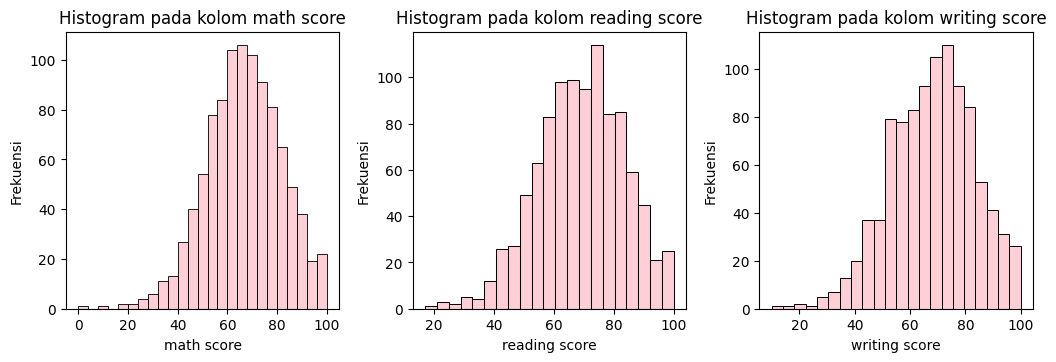

In [6]:
#Histogram pada kolom numerik
student_num = student.select_dtypes(include='number')

plt.figure(figsize=(14, 10))
for i, col in enumerate(student_num):
    plt.subplot(3, 4, i + 1)
    sns.histplot(student[col], color='pink')
    plt.title(f'Histogram pada kolom {col}')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

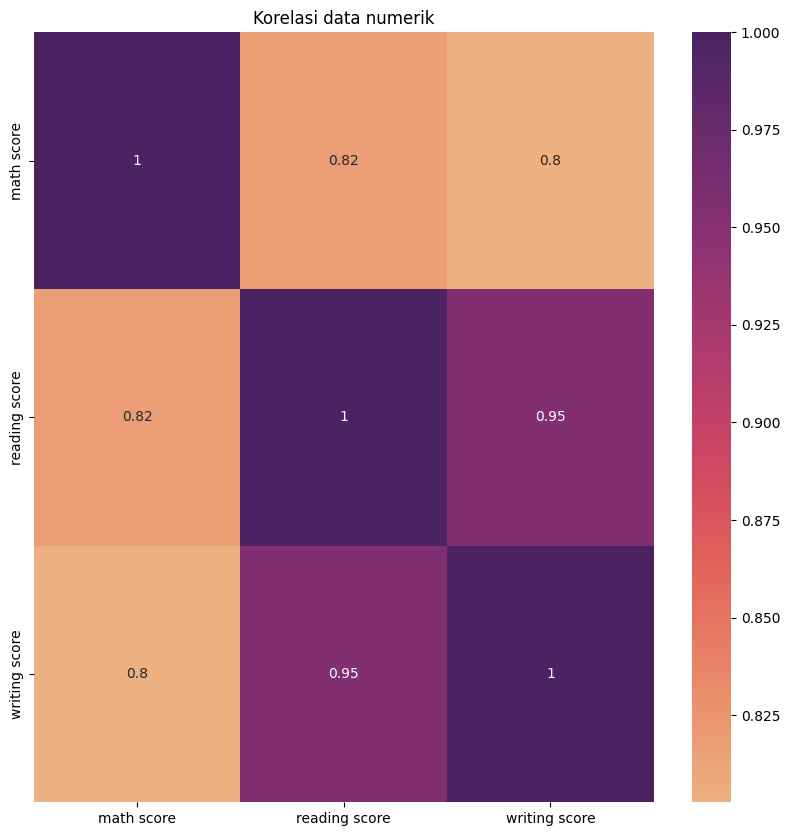

In [7]:
#Korelasi data numerik menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(student_num.corr(), annot=True, cmap='flare')
plt.title('Korelasi data numerik')
plt.show()

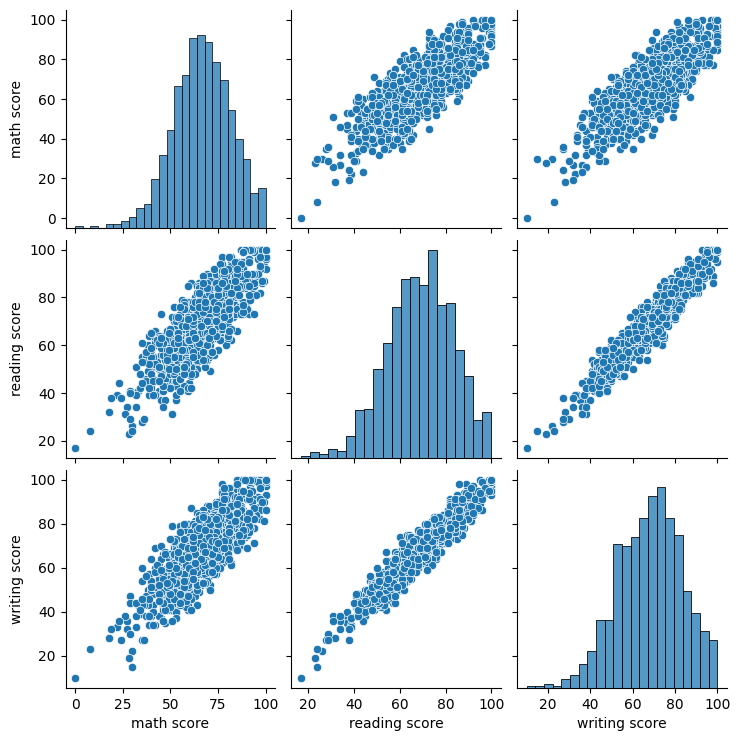

In [8]:
#Melihat pairplot untuk data numerik
sns.pairplot(student_num)
plt.show()

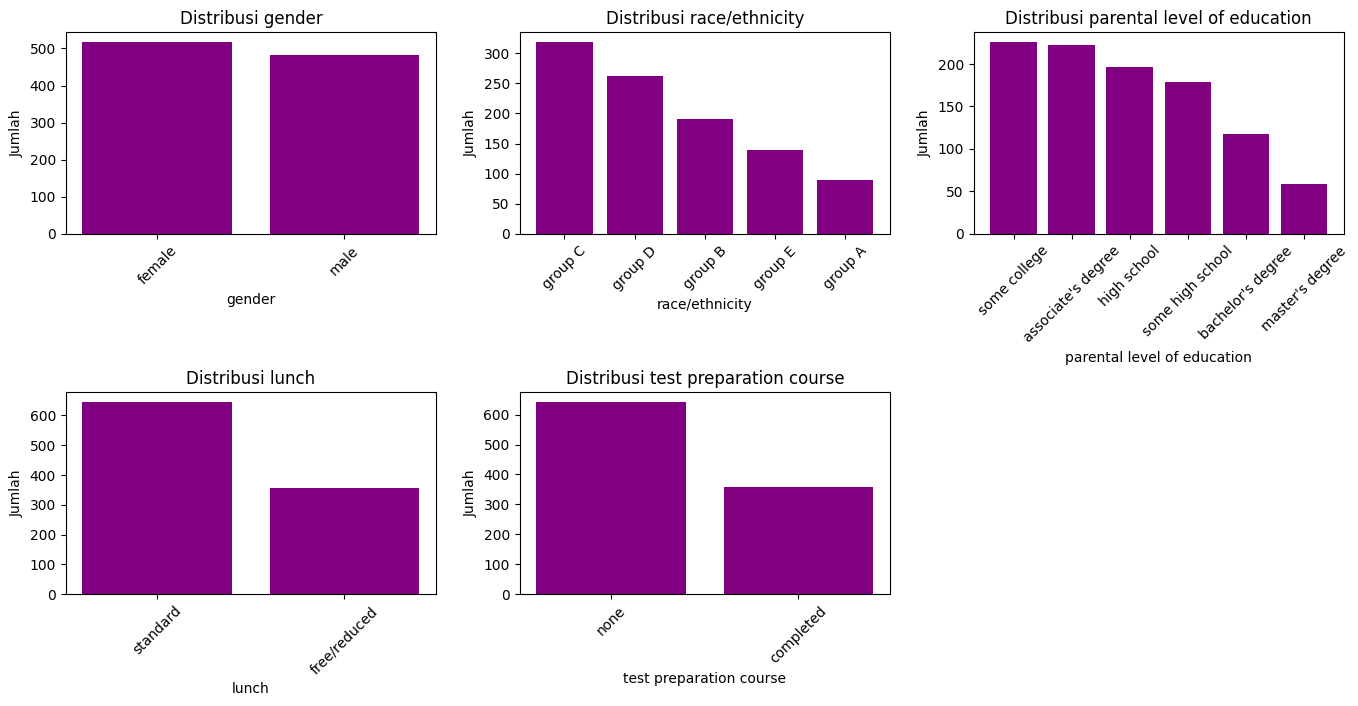

In [9]:
#Histogram pada kolom kategorikal
student_cat = student.select_dtypes(include='object')

plt.figure(figsize=(14, 10))

for i, col in enumerate(student_cat):
    plt.subplot(3, 3, i + 1)
    counts = student[col].value_counts().sort_values(ascending=False)
    plt.bar(counts.index, counts.values, color='purple')
    plt.title(f"Distribusi {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)

plt.tight_layout(pad=2)
plt.show()

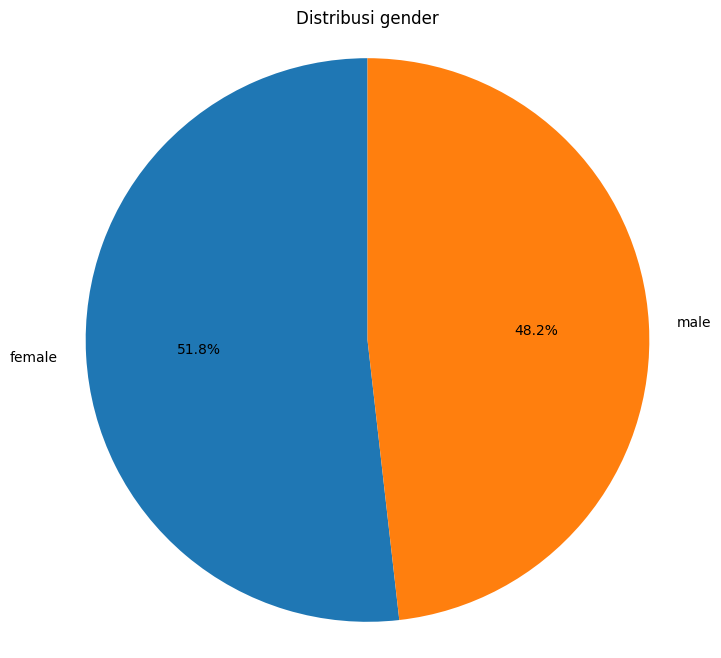

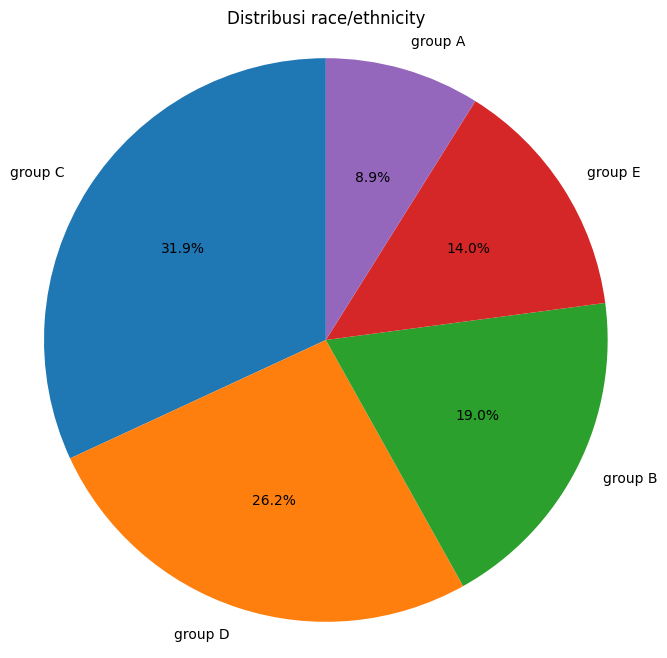

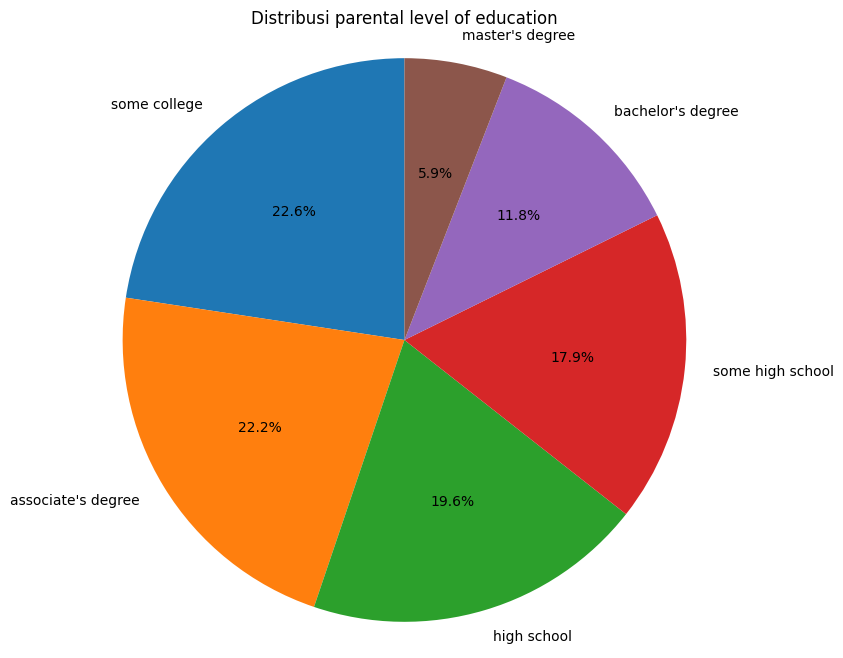

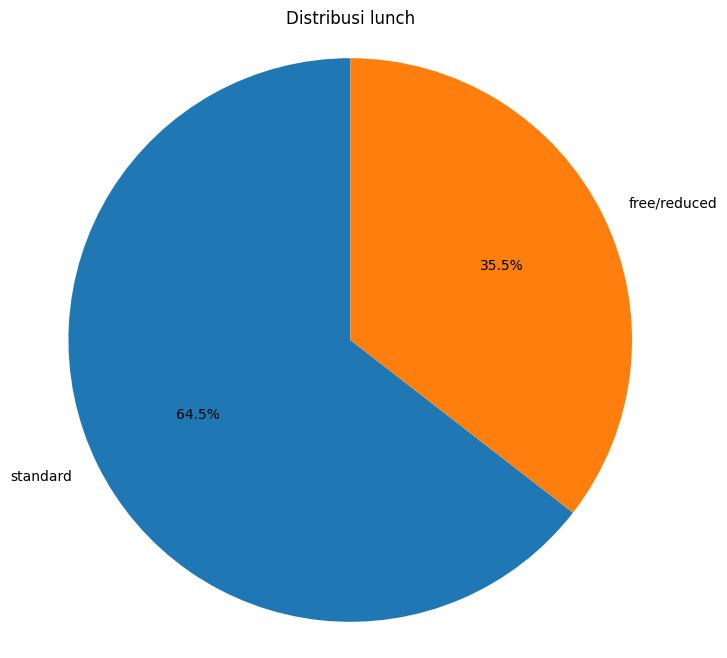

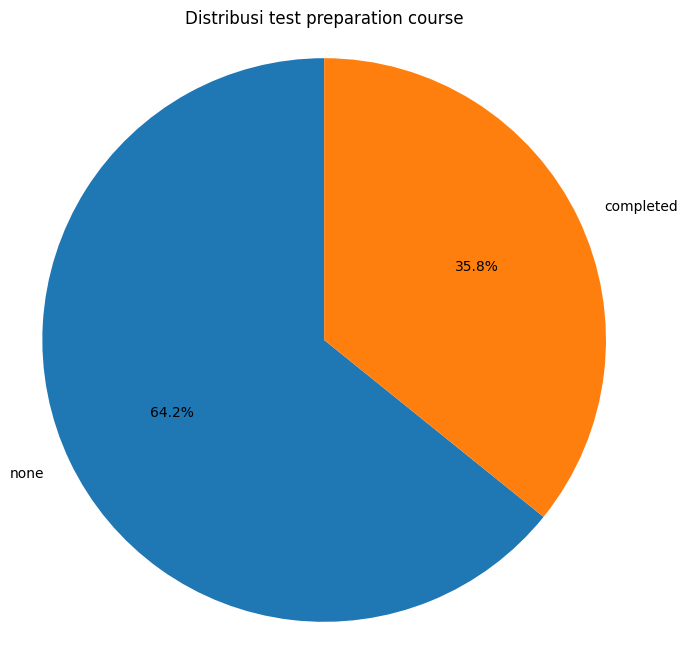

In [10]:
#Melihat sebaran data kategorik dengan persen menggunakan pie chart
for col in student_cat.columns:
    plt.figure(figsize=(8,8))
    plt.pie(student_cat[col].value_counts(),labels=student_cat[col].value_counts().index,autopct='%1.1f%%',startangle=90)
    plt.title(f'Distribusi {col}')
    plt.axis('equal')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
#Cek data kosong
student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
#Cek data duplikat
student.duplicated().sum()

np.int64(0)

In [13]:
#Melakukan binning untuk siswa yang rata2 score math, reading, dan writting dibawah 60 itu failed dan diatas 60 pass
student['status'] = student[['math score','reading score','writing score']].mean(axis=1).apply(lambda x: 'Failed' if x <= 60 else 'Pass')
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,status
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Failed
4,male,group C,some college,standard,none,76,78,75,Pass
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,Pass
996,male,group C,high school,free/reduced,none,62,55,55,Failed
997,female,group C,high school,free/reduced,completed,59,71,65,Pass
998,female,group D,some college,standard,completed,68,78,77,Pass


In [14]:
student_cat = student.select_dtypes(include='object')
encode = LabelEncoder()
for col in student_cat.columns:
    student[col] = encode.fit_transform(student[col])
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,status
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,1
996,1,2,2,0,1,62,55,55,0
997,0,2,2,0,0,59,71,65,1
998,0,3,4,1,0,68,78,77,1


In [15]:
score = ['math score','reading score','writing score']

scale = MinMaxScaler()
student[score] = scale.fit_transform(student[score])
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,status
0,0,1,1,1,1,0.72,0.662651,0.711111,1
1,0,2,4,1,0,0.69,0.879518,0.866667,1
2,0,1,3,1,1,0.90,0.939759,0.922222,1
3,1,0,0,0,1,0.47,0.481928,0.377778,0
4,1,2,4,1,1,0.76,0.734940,0.722222,1
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.987952,0.944444,1
996,1,2,2,0,1,0.62,0.457831,0.500000,0
997,0,2,2,0,0,0.59,0.650602,0.611111,1
998,0,3,4,1,0,0.68,0.734940,0.744444,1


In [17]:
X = student.drop('status', axis=1)
y = student['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)